# Profits

### Input Variables:

$\mathbb{L}$ Labour Portfolio  
$\mathbb{D}$ Demand Shocks    
  
$\mathbb{W}$ Wages  
$\mathbb{F}$ Production  
$\mathbb{FC}$ Firing Cost  
  
$\mathbf{M}$ Matrices with Feasibility Indexes 

### Output Variables:

$\mathbf{P}$ Matrix with Profits for each State  

## Function:

As of: 29/04/2015

In [45]:
function Profits(L::Array{Any,1},D::Array{Float64,1},W::Array{Float64,1},F::Array{Float64,1},FC::Array{Float64,1},M::(Array{Array{Int64,1},1},Array{Array{Int64,1},1}))
    
    """Creates a Sparse Matrix with all 
    the profits for each feasible change 
    in the Labour Portfolio.

    Parameters
    ----------
    L : Labour Portfolio
    D : Demand Shocks 
    W : Wages
    F : Production
    FC: Firing Cost
    M : Matrices with Feasibility Indexes
    
    Output
    ----------
    P : Matrix with Profits for each State
    """
    
    G=length(L[1]);
    P=similar(M[1],Array{Float64,2});
    
    for i=1:length(L)
        
        P[i]=Array(Float64,length(D),length(M[1][i]));        # 42/787 = 5%
        
    end
    
    P0=[M[1]...];
    P1=[M[2]...];
    
    Fl=[map(x->x'*F,L)...];
    Wl=[map(x->x'*W,L)...];
    
    k=0;
    j=1;
    
    for (i,x) in enumerate(P0)                                # 43/787 = 5%
        
        Fcl=0.;
        
        for g=2:G-1                                           # 52/787 = 7%
            
            Fcl+=FC[g]*(L[x][g-1]-L[P1[i]][g]);               # 161/787 = 20%
            
        end
        
        Fcl+=FC[G]*(L[x][G-1]+L[x][G]-L[P1[i]][G])            # 51/787 = 7%
        
        if x>k
            
            j=1;
            
        else
            
            j+=1;
            
        end
        
        for d=1:length(D)
            
            P[x][d,j]=min(D[d],Fl[P1[i]])-Wl[P1[i]]-Fcl;     # 382/787 = 49%
            
        end
        
        k=x;
        
    end
    
    return P
    
end

Profits (generic function with 1 method)

In [51]:
52/787

0.06607369758576874

## Growing Size

$G$

In [3]:
import LabourDP

N=3;
α₁=0.8;
β₁=0.1;
F_0=0.8;
F_G=1.0;
F̂=1.1;
ϕ=0.2;
S=true;
M_D=10.;
m_D=5.;
ρ=0.8;
N_D=6;
d=2.;
N_G=10;

## Time

Max Size and Sample Size

In [4]:
Ms=6;
Ss=1;

### Test

In [5]:
# Warm Up Run
G=3;
W=LabourDP.Wages(G,β₁,α₁);
F=LabourDP.Production(G,F_0,F_G,F̂,div(G,2)+1);
FC=LabourDP.FiringCost(G,ϕ,S,W);
D=LabourDP.Demand(M_D,m_D,ρ,N_D,d);
fP=LabourDP.fPort(G);
L=LabourDP.LabourPortfolio(G,N,N_G,fP);
Feasf=LabourDP.fFeas(G,N);
Feas=LabourDP.FeasibleChoices(Feasf,L);
Profits(L,D[1],W,F,FC,Feas);#

x=[1:Ms-2];
t=[1.0:Ms-2];
b=[1.0:Ss];

for i=1:Ms-2
    
    G=i+2;
    W=LabourDP.Wages(G,β₁,α₁);
    F=LabourDP.Production(G,F_0,F_G,F̂,div(G,2)+1);
    FC=LabourDP.FiringCost(G,ϕ,S,W);
    D=LabourDP.Demand(M_D,m_D,ρ,N_D,d);
    fP=LabourDP.fPort(G);
    L=LabourDP.LabourPortfolio(G,N,N_G,fP);
    Feasf=LabourDP.fFeas(G,N);
    Feas=LabourDP.FeasibleChoices(Feasf,L);
    
    x[i]=length(L);
    
    for j=1:Ss

        a=@elapsed Profits(L,D[1],W,F,FC,Feas)
        b[j]=a;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

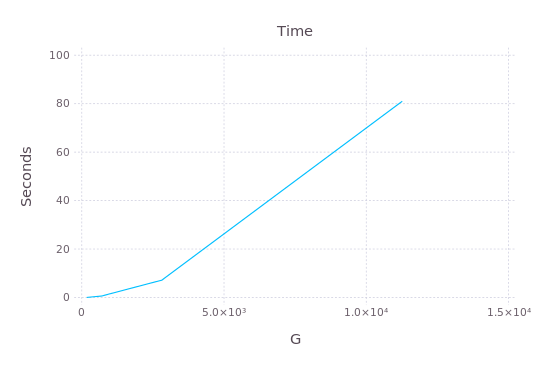

In [6]:
using Gadfly

plot(x=x, y=t,Guide.xlabel("G"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line, Geom.point)

## Memory

Max Size and Sample Size

In [7]:
Ms=6;
Ss=1;

### Test

In [8]:
# Warm Up Run
G=3;
W=LabourDP.Wages(G,β₁,α₁);
F=LabourDP.Production(G,F_0,F_G,F̂,div(G,2)+1);
FC=LabourDP.FiringCost(G,ϕ,S,W);
D=LabourDP.Demand(M_D,m_D,ρ,N_D,d);
fP=LabourDP.fPort(G);
L=LabourDP.LabourPortfolio(G,N,N_G,fP);
Feasf=LabourDP.fFeas(G,N);
Feas=LabourDP.FeasibleChoices(Feasf,L);
Profits(L,D[1],W,F,FC,Feas);#

x=[1:Ms-2];
t=[1.0:Ms-2];
b=[1.0:Ss];

for i=1:Ms-2
    
    G=i+2;
    W=LabourDP.Wages(G,β₁,α₁);
    F=LabourDP.Production(G,F_0,F_G,F̂,div(G,2)+1);
    FC=LabourDP.FiringCost(G,ϕ,S,W);
    D=LabourDP.Demand(M_D,m_D,ρ,N_D,d);
    fP=LabourDP.fPort(G);
    L=LabourDP.LabourPortfolio(G,N,N_G,fP);
    Feasf=LabourDP.fFeas(G,N);
    Feas=LabourDP.FeasibleChoices(Feasf,L);
    
    x[i]=length(L);
    
    for j=1:Ss
        
        a=@allocated Profits(L,D[1],W,F,FC,Feas)
        b[j]=a/10^9.0;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

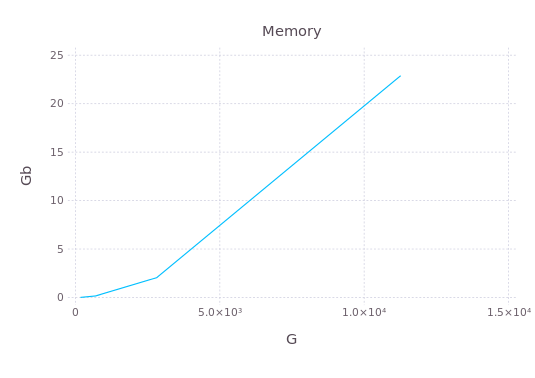

In [9]:
plot(x=x, y=t,Guide.xlabel("G"),Guide.ylabel("Gb"),Guide.title("Memory"), Geom.line, Geom.point)

## Profile

In [10]:
G=4;
N=3;
α₁=0.8;
β₁=0.1;
F_0=0.8;
F_G=1.0;
F̂=1.1;
ϕ=0.2;
S=true;
M_D=10.;
m_D=5.;
ρ=0.8;
N_D=6;
d=2.;
N_G=10;

W=LabourDP.Wages(G,β₁,α₁);
F=LabourDP.Production(G,F_0,F_G,F̂,div(G,2)+1);
FC=LabourDP.FiringCost(G,ϕ,S,W);
D=LabourDP.Demand(M_D,m_D,ρ,N_D,d);
fP=LabourDP.fPort(G);
L=LabourDP.LabourPortfolio(G,N,N_G,fP);
Feasf=LabourDP.fFeas(G,N);
Feas=LabourDP.FeasibleChoices(Feasf,L);

Sample Size

In [11]:
Rep=1;

In [46]:
Profile.clear()
@profile (for i=1:Rep;Profits(L,D[1],W,F,FC,Feas);end)
Profile.print()

787 task.jl; anonymous; line: 340
 787 .../IJulia/src/IJulia.jl; eventloop; line: 123
  787 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 160
   787 loading.jl; include_string; line: 97
    787 profile.jl; anonymous; line: 2
     42  In[45]; Profits; line: 26
     3   In[45]; Profits; line: 33
      3 ./base.jl; map; line: 189
     1   In[45]; Profits; line: 34
      1 ./base.jl; map; line: 189
     43  In[45]; Profits; line: 39
      1 abstractarray.jl; next; line: 246
     52  In[45]; Profits; line: 43
      3 ./int.jl; -; line: 0
     161 In[45]; Profits; line: 45
      1 ./array.jl; getindex; line: 0
      1 ./array.jl; getindex; line: 246
      1 ./int.jl; -; line: 0
      1 ./int.jl; -; line: 40
      1 ./promotion.jl; *; line: 0
     51  In[45]; Profits; line: 49
      1 ./array.jl; getindex; line: 0
      2 ./array.jl; getindex; line: 246
     7   In[45]; Profits; line: 51
     1   In[45]; Profits; line: 61
     382 In[45]; Profits; line: 63
      3 ./array.jl; ge